<a href="https://colab.research.google.com/github/udupa-varun/pyimagesearch_uni/blob/main/deep_learning/106/model_checkpoint_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -qq https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/model-checkpoint-tensorflow/model-checkpoint-tensorflow.zip
!unzip -qq model-checkpoint-tensorflow.zip
%cd model-checkpoint-tensorflow

/content/model-checkpoint-tensorflow


In [8]:
import argparse
import os

from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import cv2
import matplotlib.pyplot as plt

from pyimagesearch.nn.conv import MiniVGGNet

In [3]:
def plt_imshow(title, image):
    # convert from BGR to RBG and display image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RBG)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

In [19]:
args = {
    "weights": "weights/improvements/best_model.hdf5"
}

In [20]:
# load data and scale to [0, 1]
print("[INFO] loading CIFAR-10 data...")
((train_x, train_y), (test_x, test_y)) = cifar10.load_data()
train_x = train_x.astype("float") / 255.0
test_x = test_x.astype("float") / 255.0

# convert labels from integers to vectors
lb = LabelBinarizer()
train_y = lb.fit_transform(train_y)
test_y = lb.fit_transform(test_y)


[INFO] loading CIFAR-10 data...


In [21]:
# init optimizer and model
print("[INFO] compiling model...")
lr = 0.01
NUM_EPOCHS = 40
lr_schedule = ExponentialDecay(
    initial_learning_rate=lr,
    decay_steps=10000,
    decay_rate=0.96
)
opt = SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=True)
model = MiniVGGNet.build(width=32, height=32, depth=3, classes=10)
model.compile(
    loss="categorical_crossentropy",
    optimizer=opt,
    metrics=["accuracy"]
)

[INFO] compiling model...


In [22]:
# construct the callback to save only the *best* model to disk
# based on validation loss
checkpoint = ModelCheckpoint(
    args["weights"], 
    monitor="val_loss",
    save_best_only=True,
    verbose=1
)
callbacks = [checkpoint]

In [23]:
# train network
print("[INFO] training network...")
H = model.fit(
    train_x,
    train_y,
    validation_data=(test_x, test_y),
    batch_size=64,
    epochs=NUM_EPOCHS,
    callbacks=callbacks,
    verbose=2
)

[INFO] training network...
Epoch 1/40

Epoch 1: val_loss improved from inf to 1.50039, saving model to weights/improvements/best_model.hdf5
782/782 - 10s - loss: 1.6979 - accuracy: 0.4360 - val_loss: 1.5004 - val_accuracy: 0.4976 - 10s/epoch - 13ms/step
Epoch 2/40

Epoch 2: val_loss improved from 1.50039 to 0.99723, saving model to weights/improvements/best_model.hdf5
782/782 - 8s - loss: 1.2099 - accuracy: 0.5817 - val_loss: 0.9972 - val_accuracy: 0.6484 - 8s/epoch - 10ms/step
Epoch 3/40

Epoch 3: val_loss did not improve from 0.99723
782/782 - 8s - loss: 1.0045 - accuracy: 0.6520 - val_loss: 1.2188 - val_accuracy: 0.6006 - 8s/epoch - 10ms/step
Epoch 4/40

Epoch 4: val_loss improved from 0.99723 to 0.78750, saving model to weights/improvements/best_model.hdf5
782/782 - 8s - loss: 0.8925 - accuracy: 0.6913 - val_loss: 0.7875 - val_accuracy: 0.7277 - 8s/epoch - 11ms/step
Epoch 5/40

Epoch 5: val_loss did not improve from 0.78750
782/782 - 8s - loss: 0.8073 - accuracy: 0.7188 - val_loss:

In [24]:
def display_learning_curves(history):
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs_range = range(NUM_EPOCHS)

    fig = plt.figure(figsize=(12,6))

    plt.subplot(1,2,1)
    plt.plot(epochs_range, acc, label="train accuracy")
    plt.plot(epochs_range, val_acc, label="validation accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.legend(loc="lower right")

    plt.subplot(1,2,2)
    plt.plot(epochs_range, loss, label="train loss")
    plt.plot(epochs_range, val_loss, label="validation loss")
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid()
    plt.legend(loc="upper right")

    fig.tight_layout()
    plt.show()

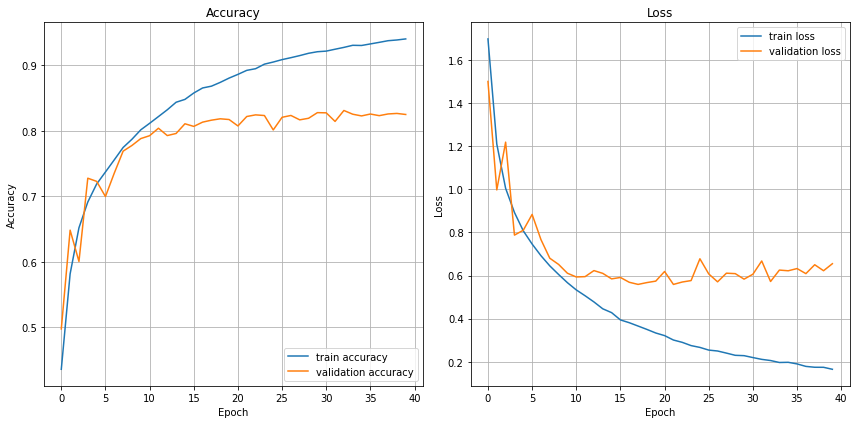

In [25]:
display_learning_curves(H)